In [1]:
#Importing important Library
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading the csv file
car=pd.read_csv("Car_Prediction.csv")
car

,Unnamed: 0,Brand,Model,Manufacturing Year,Driven Kilometer,Fuels,No. of Owner,Variant,Location,Price
0,0,KIA,SELTOS,2020,"5,999 km",Petrol,1st Owner,GTX+,New Delhi,"₹17,22,000"
1,1,KIA,SELTOS,2020,"9,417 km",Petrol,1st Owner,GTX,New Delhi,"₹16,81,000"
2,2,Hyundai,Grand,2019,"19,964 km",Petrol,1st Owner,MAGNA,New Delhi,"₹5,03,000"
3,3,Maruti,Alto,2011,"12,030 km",Petrol,2nd Owner,LXI,New Delhi,"₹1,74,000"
4,4,Hyundai,Grand,2019,"20,969 km",Petrol,1st Owner,MAGNA,New Delhi,"₹5,28,000"
...,...,...,...,...,...,...,...,...,...,...
5501,5501,HONDA,AMAZE,2019,"20,700 KM",PETROL,1ST OWNER,1.2L,Noida,"₹6,50,000"
5502,5502,Maruti,Suzuki,2011,"29,838 KM",PETROL,2ND OWNER,LXIManual,Noida,"₹1,69,000"
5503,5503,Maruti,Suzuki,2018,"58,200 KM",CNG,1ST OWNER,LXI,Noida,"₹4,28,000"
5504,5504,Mahindra,Thar,2022,"1,102 KM",PETROL,1ST OWNER,LX,Noida,"₹15,52,000"


In [3]:
#Dropping Unnecessary Columns
car.drop(['Unnamed: 0','Location'],axis=1,inplace=True)

**Data Preprocessing**

In [4]:
car

,Brand,Model,Manufacturing Year,Driven Kilometer,Fuels,No. of Owner,Variant,Price
0,KIA,SELTOS,2020,"5,999 km",Petrol,1st Owner,GTX+,"₹17,22,000"
1,KIA,SELTOS,2020,"9,417 km",Petrol,1st Owner,GTX,"₹16,81,000"
2,Hyundai,Grand,2019,"19,964 km",Petrol,1st Owner,MAGNA,"₹5,03,000"
3,Maruti,Alto,2011,"12,030 km",Petrol,2nd Owner,LXI,"₹1,74,000"
4,Hyundai,Grand,2019,"20,969 km",Petrol,1st Owner,MAGNA,"₹5,28,000"
...,...,...,...,...,...,...,...,...
5501,HONDA,AMAZE,2019,"20,700 KM",PETROL,1ST OWNER,1.2L,"₹6,50,000"
5502,Maruti,Suzuki,2011,"29,838 KM",PETROL,2ND OWNER,LXIManual,"₹1,69,000"
5503,Maruti,Suzuki,2018,"58,200 KM",CNG,1ST OWNER,LXI,"₹4,28,000"
5504,Mahindra,Thar,2022,"1,102 KM",PETROL,1ST OWNER,LX,"₹15,52,000"


In [5]:
#Checking the shape of the dataset
print('Shape of Data :',car.shape)

Shape of Data : (5506, 8)


In [6]:
#Checking the null values if any
car.isnull().sum()

Brand                   0
Model                   0
Manufacturing Year      0
Driven Kilometer        0
Fuels                   0
No. of Owner            0
Variant                 0
Price                 732
dtype: int64

As we can that there are many null value present in our target column which isthe Price column we have to drop the null value to get the better accuracy of the Model

<AxesSubplot:>

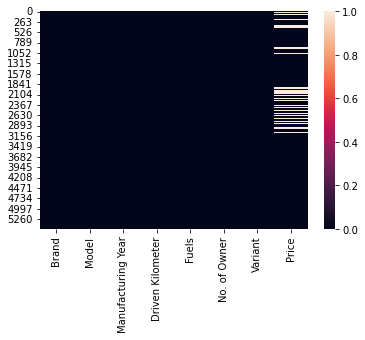

In [7]:
#plotting heatmap to show the null value present in each column.
sns.heatmap(car.isnull())

In [8]:
#Checking the nature of DType
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5506 entries, 0 to 5505
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand               5506 non-null   object
 1   Model               5506 non-null   object
 2   Manufacturing Year  5506 non-null   int64 
 3   Driven Kilometer    5506 non-null   object
 4   Fuels               5506 non-null   object
 5   No. of Owner        5506 non-null   object
 6   Variant             5506 non-null   object
 7   Price               4774 non-null   object
dtypes: int64(1), object(7)
memory usage: 344.2+ KB


In [9]:
#Price is an object data we have convert it into float  value.

In [10]:
car['Price']=car['Price'].str.replace(',', '').str.replace('₹', '')

In [11]:
car['Price'].fillna(0,inplace=True)

In [12]:
car['Price']=car['Price'].astype(float)

In [13]:
#Driven Kilometer also have have some unnecessary value with it remove defaults space and KM and converting it into int value Dtype
car['Driven Kilometer']=car['Driven Kilometer'].str.replace(',', '').str.replace('KM', '')


In [14]:
car['Driven Kilometer']=car['Driven Kilometer'].str.replace(',', '').str.replace('km', '')


In [15]:
car['Driven Kilometer']=car['Driven Kilometer'].astype(float)

In [16]:
# transforming 'Price' with a log transformation to reduce the effect of extreme Value improve model accuracy
log_price = np.log(car['Price'])

# Then we add it to our data frame
car['log_Price'] = log_price
car.head()

,Brand,Model,Manufacturing Year,Driven Kilometer,Fuels,No. of Owner,Variant,Price,log_Price
0,KIA,SELTOS,2020,5999.0,Petrol,1st Owner,GTX+,1722000.0,14.358997
1,KIA,SELTOS,2020,9417.0,Petrol,1st Owner,GTX,1681000.0,14.334899
2,Hyundai,Grand,2019,19964.0,Petrol,1st Owner,MAGNA,503000.0,13.128345
3,Maruti,Alto,2011,12030.0,Petrol,2nd Owner,LXI,174000.0,12.066811
4,Hyundai,Grand,2019,20969.0,Petrol,1st Owner,MAGNA,528000.0,13.176852


In [17]:
car['Driven Kilometer']

0        5999.0
1        9417.0
2       19964.0
3       12030.0
4       20969.0
         ...   
5501    20700.0
5502    29838.0
5503    58200.0
5504     1102.0
5505    25519.0
Name: Driven Kilometer, Length: 5506, dtype: float64

In [18]:
#Changing data to lower case as it will show two diffrent data.  
car['Fuels']=[x.lower() for x in car['Fuels']]
print(car['Fuels'])

0       petrol
1       petrol
2       petrol
3       petrol
4       petrol
         ...  
5501    petrol
5502    petrol
5503       cng
5504    petrol
5505    petrol
Name: Fuels, Length: 5506, dtype: object


In [19]:
#Changing data to lower case as it will show two diffrent data.  
car['No. of Owner']=[x.lower() for x in car['No. of Owner']]
print(car['No. of Owner'])

0       1st owner
1       1st owner
2       1st owner
3       2nd owner
4       1st owner
          ...    
5501    1st owner
5502    2nd owner
5503    1st owner
5504    1st owner
5505    2nd owner
Name: No. of Owner, Length: 5506, dtype: object


In [20]:
#Changing data to lower case as it will show two diffrent data.  
car['Brand']=[x.lower() for x in car['Brand']]
print(car['Brand'])

0            kia
1            kia
2        hyundai
3         maruti
4        hyundai
          ...   
5501       honda
5502      maruti
5503      maruti
5504    mahindra
5505     renault
Name: Brand, Length: 5506, dtype: object


<AxesSubplot:>

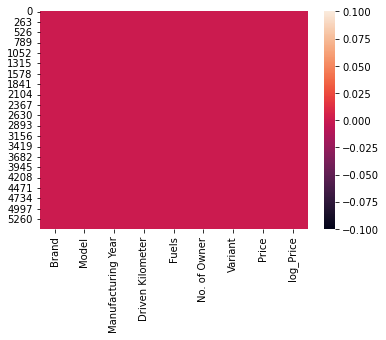

In [21]:
sns.heatmap(car.isnull())

**Feature Extraction**

In [22]:
 #Calculating  the actual Age of the car.

car["Age"]=2023-car["Manufacturing Year"]

In [23]:
car.drop(['Manufacturing Year'],axis=1,inplace=True) #Dropping the Manufacture_Year  it serves no purpose now

In [24]:
car.drop(['Variant'],axis=1,inplace=True)

#    Data Exploration & Visualization

**Checking no of max unique value of  in each columns through Barplot**

In [25]:
#keeping  all the categorical variables in object_cols
s = (car.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['Brand', 'Model', 'Fuels', 'No. of Owner']


<AxesSubplot:title={'center':'Number Of Unique value of the categorical Features'}>

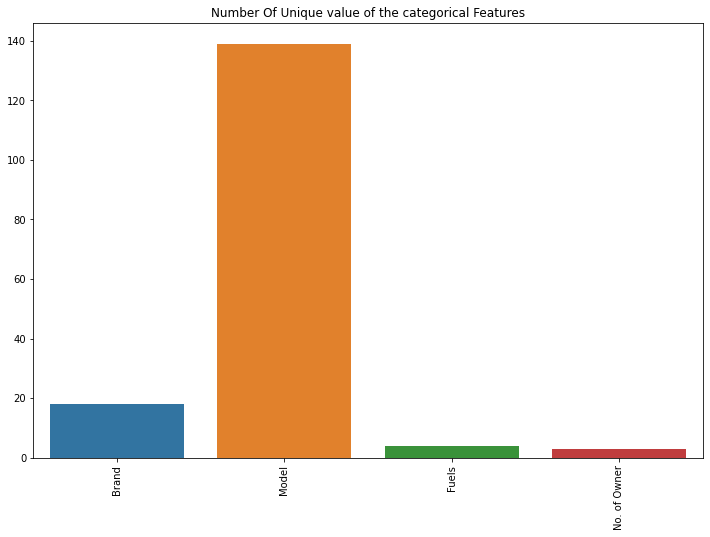

In [26]:
# Creating barplot to visualize which colum has high no. of unque value count of categorical feature.
unique_val=[]
for col in object_cols:
    unique_val.append (car[col].unique().size)
plt.figure(figsize=(12,8))
plt.title('Number Of Unique value of the categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_val)

observation :As from the above result driven Variant  has the high no of Unique value followed by Model brand has 31 unique value.

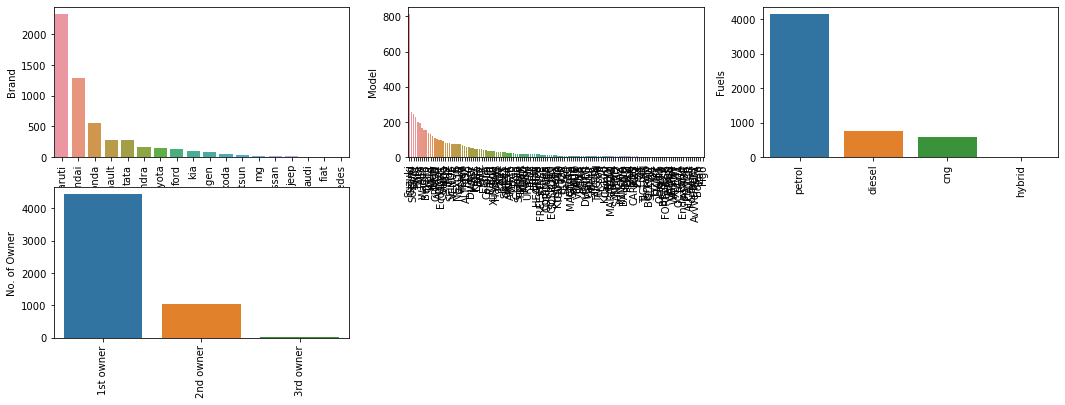

In [27]:
# Visulaizing the value counts in each of the columns. 
plt.figure(figsize=(18,36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index=1
for col in object_cols:
    y= car[col].value_counts()
    plt.subplot(11,3,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index),y=y)
    index+=1

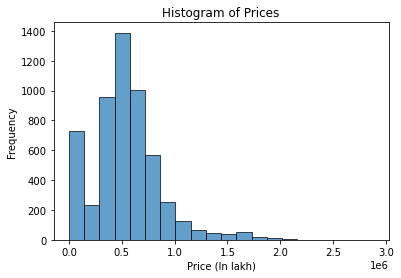

In [28]:
# Creating a histogram of the "Price" column
car["Price"].plot.hist(bins=20, edgecolor='black', alpha=0.7)

# Adding labels and titles to the plot
plt.xlabel("Price (In lakh)")
plt.ylabel("Frequency")
plt.title("Histogram of Prices")

# Showing the plot
plt.show()

observation: from above observation  we can see that frequency is high in price between 1 to 9 lakh and after that sudden decrease.

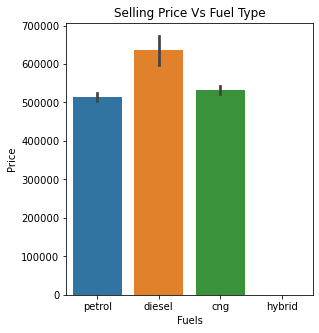

In [29]:
plt.figure(figsize=[15,5])
plt.subplot(1,3,3)
sns.barplot(car['Fuels'],car['Price'])
plt.title('Selling Price Vs Fuel Type')

plt.show()

Diesel vechile price is higher than that of petrol and CNG , hybrid is hitting the lower circuit.

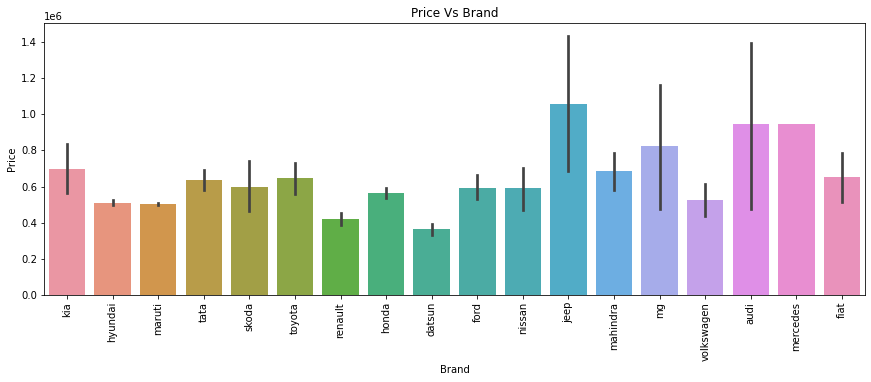

In [30]:
plt.figure(figsize=[50,5])

plt.subplot(1,3,1)
sns.barplot(car['Brand'], car['Price'])
plt.title('Price Vs Brand')
plt.xticks(rotation=90)
plt.show()

Jeep has the highest Price followed by Audi & Mercedes. As we are moving to luxury car Brands there been seen in the increase of the Price. 

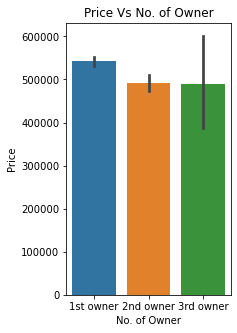

In [31]:
plt.figure(figsize=[10,5])
plt.subplot(1,3,2)
sns.barplot(car['No. of Owner'],car['Price'])
plt.title('Price Vs No. of Owner')
plt.show()

1st owner car Price is higher to that of the 2nd and 3rd owner

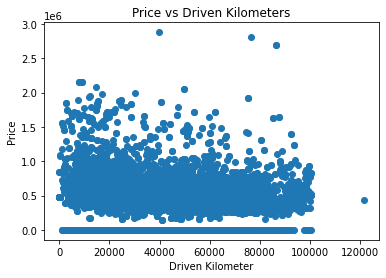

In [32]:
# Creating a scatter plot
plt.scatter(car['Driven Kilometer'],car['Price'])

# Adding labels and title to the plot
plt.xlabel('Driven Kilometer')
plt.ylabel('Price')
plt.title('Price vs Driven Kilometers')

# Show the plot
plt.show()

As the no of kilometers increases  Price of vechile decreasing.

<AxesSubplot:title={'center':'Price and Year'}, xlabel='Age', ylabel='Price'>

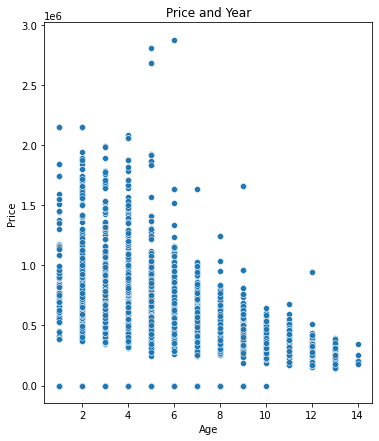

In [33]:
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Year")
sns.scatterplot(x='Age',y='Price',data=car)

Observation : Age determines the Price of the car if it increasing Price decresing.

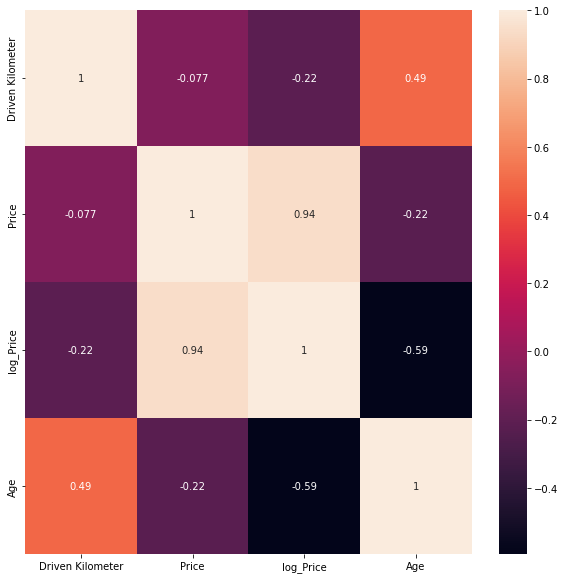

In [34]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (10,10))
sns.heatmap(car.corr(), annot = True,)

plt.show()

We consider a relation between Age and Driven kilometer

In [35]:
# Computing the number of unique models for each brand
brand_model_counts = car.groupby("Brand")["Model"].nunique()

# Creating a dictionary that maps each brand to a model category
model_categories = {
    Brand: "many_models" if count > brand_model_counts.mean() else "few_models"
    for Brand, count in brand_model_counts.items()
}

# Creating a new column that summarizes the number of models for each brand
car["brand_model_category"] = car["Brand"].map(model_categories)

# Use get_dummies to one-hot encode the brand_model_category column
car = pd.get_dummies(car, columns=["brand_model_category"])

# Droping the original model column
car = car.drop("Model", axis=1)




In [36]:
# Encode the Brand column as dummies
dummies = pd.get_dummies(car['Brand'], prefix='Brand')
car = pd.concat([car, dummies], axis=1)

# Calculate the correlation between the dummy variables and the Price column
correlations = []
for col in dummies.columns:
    correlation = car[col].corr(car['Price'])
    correlations.append((col, correlation))

# Print the correlation values
for col, corr in correlations:
    print("The correlation between {} and Price is: {:.3f}".format(col, corr))

The correlation between Brand_audi and Price is: 0.049
The correlation between Brand_datsun and Price is: -0.035
The correlation between Brand_fiat and Price is: 0.007
The correlation between Brand_ford and Price is: 0.027
The correlation between Brand_honda and Price is: 0.030
The correlation between Brand_hyundai and Price is: -0.035
The correlation between Brand_jeep and Price is: 0.078
The correlation between Brand_kia and Price is: 0.068
The correlation between Brand_mahindra and Price is: 0.077
The correlation between Brand_maruti and Price is: -0.073
The correlation between Brand_mercedes and Price is: 0.016
The correlation between Brand_mg and Price is: 0.049
The correlation between Brand_nissan and Price is: 0.010
The correlation between Brand_renault and Price is: -0.079
The correlation between Brand_skoda and Price is: 0.020
The correlation between Brand_tata and Price is: 0.068
The correlation between Brand_toyota and Price is: 0.056
The correlation between Brand_volkswagen

In [37]:
car.drop(['Brand'],axis=1,inplace=True)


In [38]:
car.drop(['log_Price'],axis=1,inplace=True)

In [39]:
#using Onehotencorder 
car= pd.get_dummies(car, columns=["Fuels"])

In [40]:
car= pd.get_dummies(car,columns=['No. of Owner'])

In [41]:
car.shape #checking the shape of the data 

(5506, 30)

In [42]:
df=car

In [43]:
df

,Driven Kilometer,Price,Age,brand_model_category_few_models,brand_model_category_many_models,Brand_audi,Brand_datsun,Brand_fiat,Brand_ford,Brand_honda,...,Brand_tata,Brand_toyota,Brand_volkswagen,Fuels_cng,Fuels_diesel,Fuels_hybrid,Fuels_petrol,No. of Owner_1st owner,No. of Owner_2nd owner,No. of Owner_3rd owner
0,5999.0,1722000.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,9417.0,1681000.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,19964.0,503000.0,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,12030.0,174000.0,12,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,20969.0,528000.0,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5501,20700.0,650000.0,4,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
5502,29838.0,169000.0,12,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5503,58200.0,428000.0,5,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5504,1102.0,1552000.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5506 entries, 0 to 5505
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Driven Kilometer                  5506 non-null   float64
 1   Price                             5506 non-null   float64
 2   Age                               5506 non-null   int64  
 3   brand_model_category_few_models   5506 non-null   uint8  
 4   brand_model_category_many_models  5506 non-null   uint8  
 5   Brand_audi                        5506 non-null   uint8  
 6   Brand_datsun                      5506 non-null   uint8  
 7   Brand_fiat                        5506 non-null   uint8  
 8   Brand_ford                        5506 non-null   uint8  
 9   Brand_honda                       5506 non-null   uint8  
 10  Brand_hyundai                     5506 non-null   uint8  
 11  Brand_jeep                        5506 non-null   uint8  
 12  Brand_

In [45]:
#Convertinng uint8 to float datatype
df['brand_model_category_few_models']=df['brand_model_category_few_models'].astype(float)
df['brand_model_category_many_models']=df['brand_model_category_many_models'].astype(float)

df['Brand_audi']=df['Brand_audi'].astype(float)

df['Fuels_cng']=df['Fuels_cng'].astype(float)
df['Fuels_diesel']=df['Fuels_diesel'].astype(float)
df['Fuels_hybrid']=df['Fuels_hybrid'].astype(float)
df['Fuels_petrol']=df['Fuels_petrol'].astype(float)


df['Brand_datsun']=df['Brand_datsun'].astype(float)
df['Brand_fiat']=df['Brand_fiat'].astype(float)
df['Brand_honda']=df['Brand_honda'].astype(float)
df['Brand_hyundai']=df['Brand_hyundai'].astype(float)
df['Brand_jeep']=df['Brand_jeep'].astype(float)
df['Brand_kia']=df['Brand_kia'].astype(float)
df['Brand_mahindra']=df['Brand_mahindra'].astype(float)

In [46]:
df['Brand_ford']=df['Brand_ford'].astype(float)
df['Brand_maruti']=df['Brand_maruti'].astype(float)
df['Brand_mercedes']=df['Brand_mercedes'].astype(float)
df['Brand_mg']=df['Brand_mg'].astype(float)
df['Brand_nissan']=df['Brand_nissan'].astype(float)
df['Brand_renault']=df['Brand_renault'].astype(float)
df['Brand_skoda']=df['Brand_skoda'].astype(float)
df['Brand_tata']=df['Brand_tata'].astype(float)
df['Brand_toyota']=df['Brand_toyota'].astype(float)
df['Brand_volkswagen']=df['Brand_volkswagen'].astype(float)
df['No. of Owner_1st owner']=df['No. of Owner_1st owner'].astype(float)
df['No. of Owner_2nd owner']=df['No. of Owner_2nd owner'].astype(float)
df['No. of Owner_3rd owner']=df['No. of Owner_3rd owner'].astype(float)

In [47]:
#log transformation for better results
df["Driven Kilometer"] = np.log1p(df["Driven Kilometer"])
df["Price"]=np.log1p(df["Price"])


In [48]:
#using these transformed columns as features in this model to check their impact on the model performance.
df["Age_squared"] = df["Age"]**2
df["Age_log"] = np.log(df["Age"])
df["Age_reciprocal"] = 1/df["Age"]

In [49]:
#Dropping the original Columns
df.drop(['Age'],axis=1,inplace=True)

In [50]:
df

,Driven Kilometer,Price,brand_model_category_few_models,brand_model_category_many_models,Brand_audi,Brand_datsun,Brand_fiat,Brand_ford,Brand_honda,Brand_hyundai,...,Fuels_cng,Fuels_diesel,Fuels_hybrid,Fuels_petrol,No. of Owner_1st owner,No. of Owner_2nd owner,No. of Owner_3rd owner,Age_squared,Age_log,Age_reciprocal
0,8.699515,14.358998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9,1.098612,0.333333
1,9.150378,14.334900,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9,1.098612,0.333333
2,9.901736,13.128347,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,16,1.386294,0.250000
3,9.395242,12.066816,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,144,2.484907,0.083333
4,9.950848,13.176853,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,16,1.386294,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5501,9.937937,13.384729,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,16,1.386294,0.250000
5502,10.303572,12.037660,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,144,2.484907,0.083333
5503,10.971658,12.966881,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,25,1.609438,0.200000
5504,7.005789,14.255056,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0.000000,1.000000


In [51]:
#checking relationship with target variable which is Price.
correlations = df.corr()["Price"].drop("Price")
print(correlations)

Driven Kilometer                    0.081405
brand_model_category_few_models    -0.123703
brand_model_category_many_models    0.123703
Brand_audi                         -0.018416
Brand_datsun                        0.020236
Brand_fiat                          0.007978
Brand_ford                         -0.013037
Brand_honda                        -0.008736
Brand_hyundai                      -0.007456
Brand_jeep                         -0.015066
Brand_kia                          -0.142110
Brand_mahindra                     -0.135426
Brand_maruti                        0.198916
Brand_mercedes                      0.006815
Brand_mg                           -0.045512
Brand_nissan                        0.004186
Brand_renault                      -0.051916
Brand_skoda                        -0.065592
Brand_tata                         -0.067706
Brand_toyota                       -0.057672
Brand_volkswagen                   -0.032267
Fuels_cng                           0.120795
Fuels_dies

# Model Training and Testing

In [52]:
from sklearn.linear_model import LinearRegression
model=RandomForestRegressor()

In [53]:
# Checking for non-numeric values
try:
    df['Price'] = df['Price'].astype(float)
except ValueError:
    # Remove non-numeric values
    df = df[df['Price'].apply(lambda x: x.replace(',', '').replace('.', '').isnumeric())]
    df['Price'] = df['Price'].astype(float)

# Checking the data type
if not np.issubdtype(df['Price'].dtype, np.number):
    # Converting to numeric data type
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Checking for outliers
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR)))]

# Fiting the model using the cleaned data
model.fit(df.drop(columns='Price'), df['Price'])

RandomForestRegressor()

In [54]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Split the data into features (X) and target (y)
X = df.drop("Price", axis=1)
y = df["Price"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)


# Evaluate the model on the test data
score = reg_rf.score(X_test, y_test)
print("Test R^2 score: {:.2f}".format(score))

y_pred_rf = reg_rf.predict(X_test)
r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)
print("RMSE :",rmse)


Test R^2 score: 0.78
R_squared : 0.7805225699927697
RMSE : 0.19274686078692704


In [55]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print("Test R^2 score: {:.2f}".format(score))

Test R^2 score: 0.69


In [56]:
# Model Summary
y_pred_model = model.predict(X_test)

r_squared = r2_score(y_test,y_pred_model)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_model))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.6852011135804836
RMSE : 0.23083888833410215


In [57]:
# Model Building
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(X_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(X_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.704578282743549
RMSE : 0.22362151717211312


In [58]:
reg_rf.score(X_train, y_train)

0.9658853587432022

In [59]:
reg_rf.score(X_test, y_test)

0.7805225699927697

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [62]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [63]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [64]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [65]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [66]:
prediction = rf_random.predict(X_test)

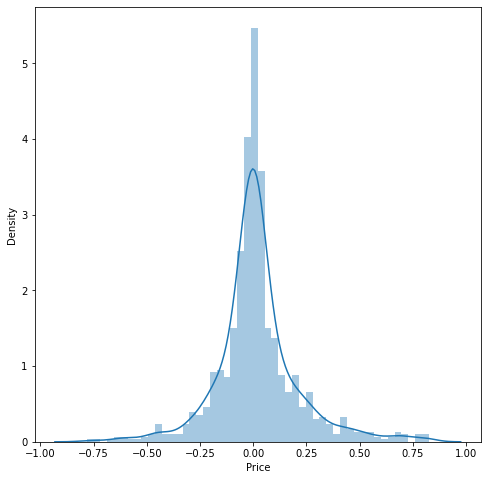

In [67]:
prediction = rf_random.predict(X_test)
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

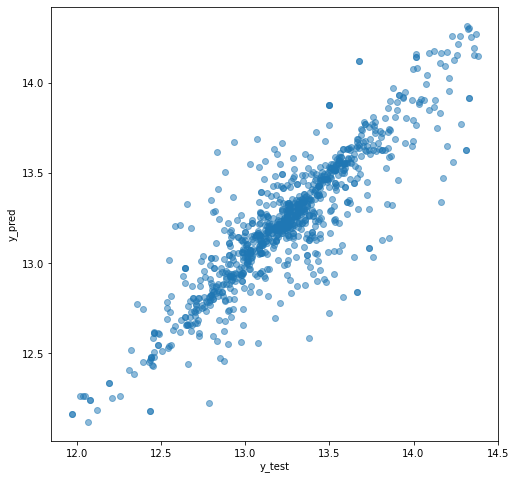

In [68]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [69]:
from sklearn import metrics

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.1260331821996116
MSE: 0.03894419967118207
RMSE: 0.19734284803656318


In [71]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred_rf), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev.head(10)

,Predicted Price,Actual Price,Residual,Difference%
0,581913.01,568001.00,-13912.01,2.45
1,488786.72,448001.00,-40785.72,9.10
2,693911.93,644001.00,-49910.93,7.75
3,586081.32,573001.00,-13080.32,2.28
4,484880.21,784001.00,299120.79,38.15
5,562628.02,542001.00,-20627.02,3.81
6,535430.75,566001.00,30570.25,5.40
7,471912.40,748001.00,276088.60,36.91
8,377953.06,360001.00,-17952.06,4.99
9,614893.10,501001.00,-113892.10,22.73
